# Measuring Dark energy

See:
* https://physicsforme.com/2011/10/04/supernovae-dark-energy-and-the-accelerating-universe/

## Imports

In [4]:
import numpy as np
from colossus.cosmology import cosmology
from colossus.lss import mass_function

import matplotlib.pyplot as plt

In [47]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
FIG_DIR="/home/christopher/research/presentations/1904_FLASH/plots/"

# Cosmologies

In [6]:
cosmology.addCosmology('70-25-5', {'flat': True, 'H0': 67.2, 'Om0': 0.30, 'Ob0': 0.05, 'sigma8': 0.81, 'ns': 0.95, 'Ode0': 0.7})
cosmology.addCosmology('50-45-5', {'flat': True, 'H0': 67.2, 'Om0': 0.5, 'Ob0': 0.05, 'sigma8': 0.81, 'ns': 0.95, 'Ode0': 0.5})
cosmology.addCosmology('80-15-5', {'flat': True, 'H0': 67.2, 'Om0': 0.20, 'Ob0': 0.05, 'sigma8': 0.81, 'ns': 0.95, 'Ode0': 0.80})

# Geometry

Let's say that we know the luminosity distance to an object. If they are a standard candle we can get at this, because

$$
m - M = 5 \log (D_L / 10pc)
$$

where $m$ is the apparent magnitude, $M$ the absolute magnitude (magnitude from 10pc). For distant things the RHS is positive, $m > M$, apparent is dimmer than absolute. That makes sense.

If the universe were expanding more quickly in the past, objects will be *more* redshifted for a given distance. Or the distance to a given redshift will be smaller.

Let's look at the famous supernova plot, particularly at the two flat universes:

At high redshifts, the universe with DE has a larger distance modulus than that without. At fixed redshift, objects in the universe with DE are further away. This fits with what we said earlier!

![supernova plot](supernova_plot.png)

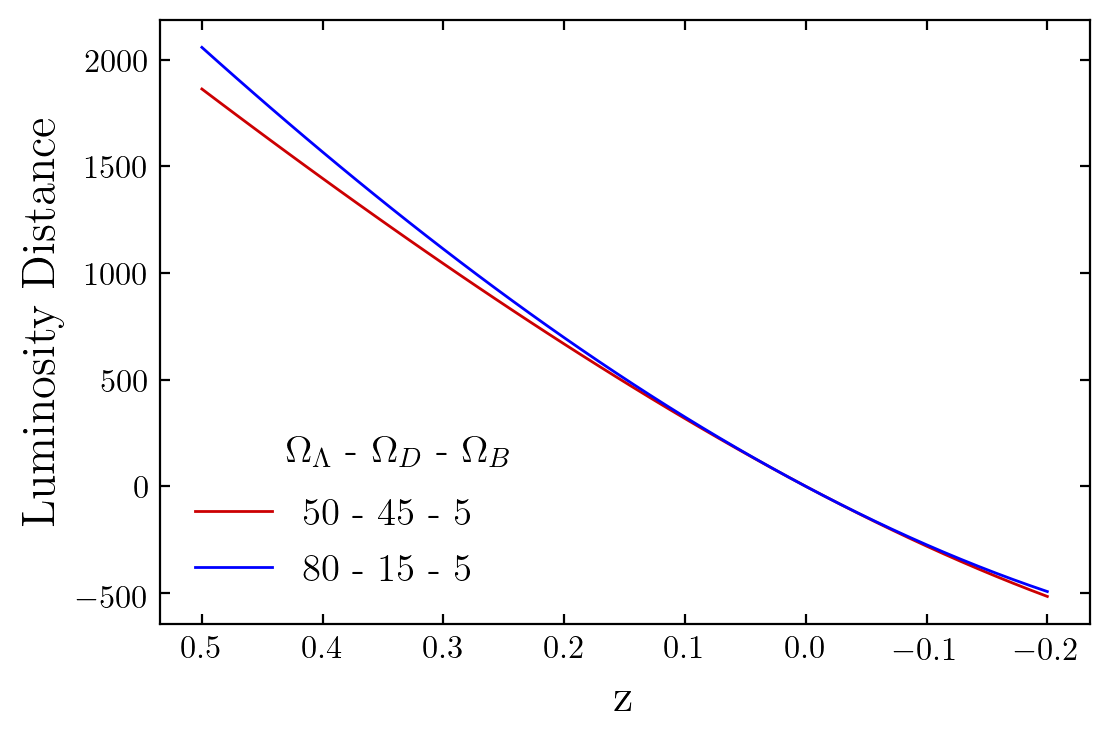

In [69]:
fig, ax = plt.subplots()

zs = np.linspace(-0.2, 0.5)

for col_cosmo, label in [
    ("50-45-5", "50 - 45 - 5"),
    ("80-15-5", "80 - 15 - 5"),
]:
    cosmo = cosmology.setCosmology(col_cosmo, {"interpolation": False})
    time_ago = cosmo.age(0) - cosmo.age(zs)
    lum_dist = cosmo.luminosityDistance(zs)
    ax.plot(zs, lum_dist, label=label)
    
    #ax.plot([zs[0], zs[-1]], [lum_dist[0], lum_dist[-1]], color="black", linestyle="--")
    
#ax.set(xlim=ax.get_xlim()[::-1], ylabel="Scale factor", xlabel=r"Time ago (Gyr)")
ax.set(xlim=ax.get_xlim()[::-1], ylabel="Luminosity Distance", xlabel=r"z")
ax.legend(loc="lower left")
ax.annotate(r"$\Omega_{\Lambda}$ - $\Omega_{D}$ - $\Omega_{B}$", (0.43, 90))

fig.savefig(f"{FIG_DIR}de_from_supernova.png", bbox_inches='tight')

# Growth

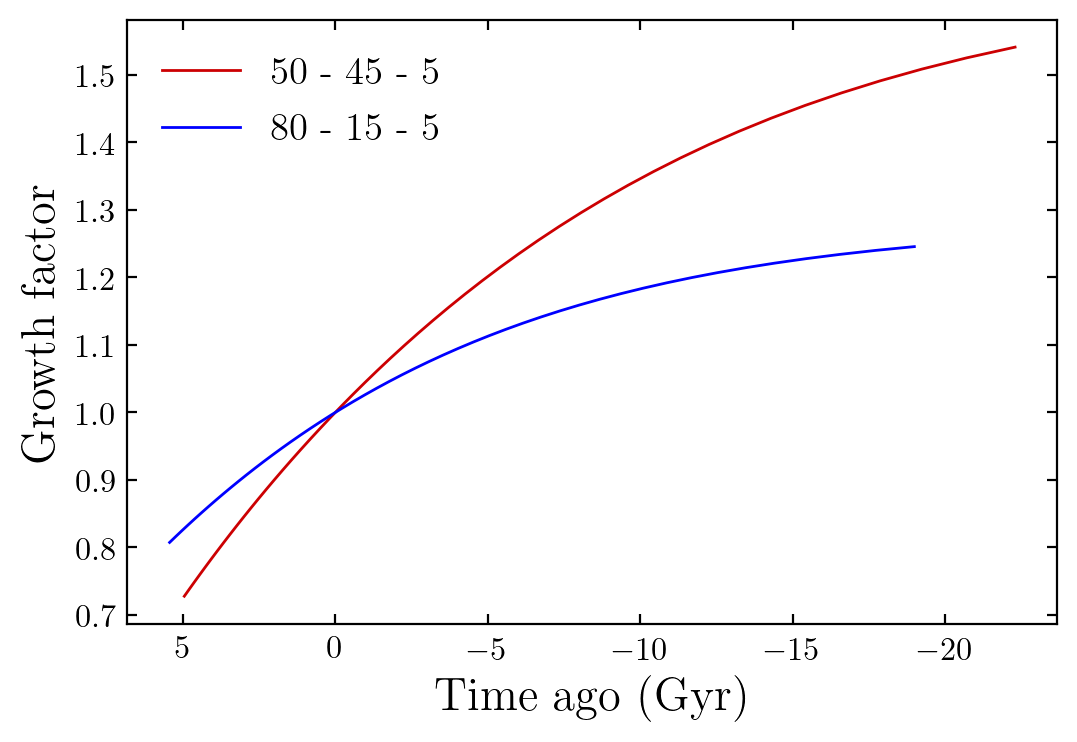

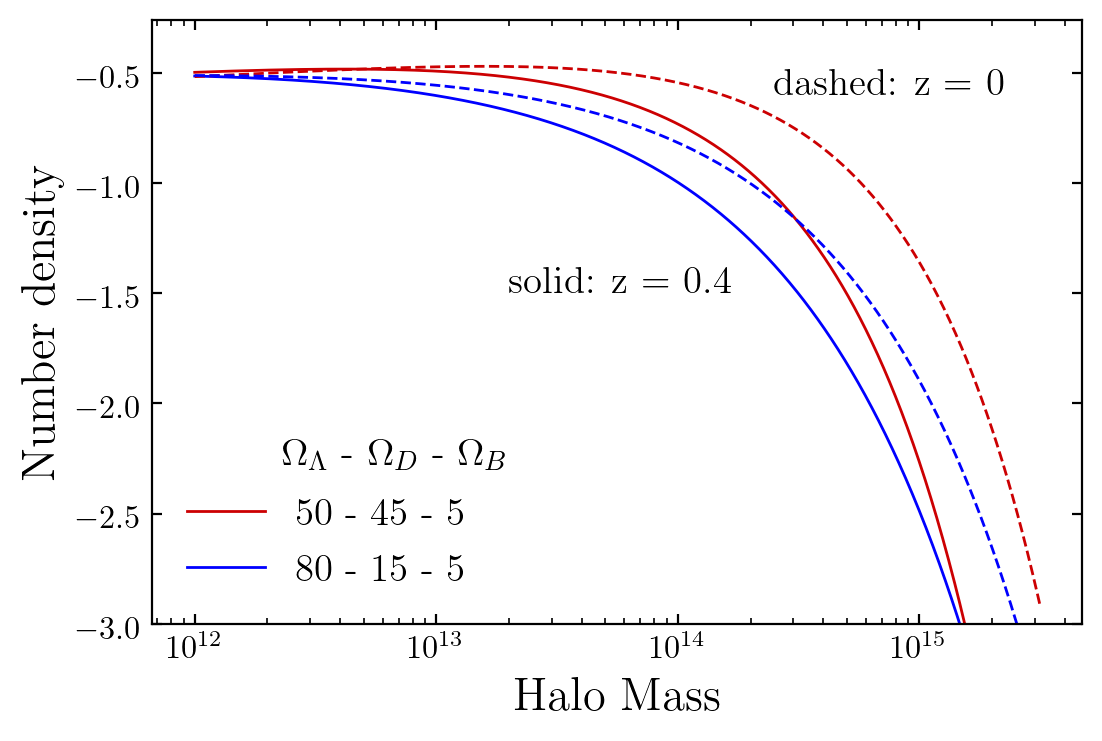

In [55]:
_, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

zs = np.linspace(-0.7, 0.5)
masses = np.logspace(12, 15.5, num=1000)

for col_cosmo, label in [
    ("50-45-5", "50 - 45 - 5"),
    ("80-15-5", "80 - 15 - 5"),
]:
    cosmo = cosmology.setCosmology(col_cosmo)
    time_ago = cosmo.age(0) - cosmo.age(zs)
    growth = cosmo.growthFactor(zs)
    ax1.plot(time_ago, growth, label=label)
    
    mass_func = mass_function.massFunction(masses, 0.4, model="tinker08", mdef="vir")
    ax2.plot(masses, np.log10(mass_func), label=label)

    
ax1.set(xlim=ax1.get_xlim()[::-1], ylabel="Growth factor", xlabel=r"Time ago (Gyr)")
ax1.legend()

ax2.set(xscale="log", ylim=(-3, None), xlabel="Halo Mass", ylabel="Number density")
ax2.legend(loc="lower left")
ax2.annotate(r"solid: z = 0.4", (10**13.3, -1.5))
ax2.annotate(r"$\Omega_{\Lambda}$ - $\Omega_{D}$ - $\Omega_{B}$", (10**12.36, -2.3))

fig2.savefig(f"{FIG_DIR}de_from_clusters1.png", bbox_inches='tight')

plt.gca().set_prop_cycle(None)

for col_cosmo, label in [
    ("50-45-5", "50 - 45 - 5"),
    #("70-25-5", "70-25-5"),
    ("80-15-5", "80 - 15 - 5"),
]:
    cosmo = cosmology.setCosmology(col_cosmo)
    mass_func = mass_function.massFunction(masses, 0.0, model="tinker08", mdef="vir")
    ax2.plot(masses, np.log10(mass_func), ls="--")
ax2.annotate(r"dashed: z = 0", (10**14.4, -0.6))
fig2.savefig(f"{FIG_DIR}de_from_clusters2.png", bbox_inches='tight')
